<a href="https://colab.research.google.com/github/Hujaifa98/AIProjects/blob/main/Flower_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import pathlib

In [ ]:
url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = keras.utils.get_file('flower_photos' , origin=url , cache_dir='.' , untar=True)

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
img_count = len(list(data_dir.glob('*/*.jpg')))
img_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5402157745_a384f0583d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6867597533_d65d1c39fb_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3465443774_6b0c75a3b1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5360769702_ec28c53b9e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3052753519_d087aaeacb_n.jpg')]

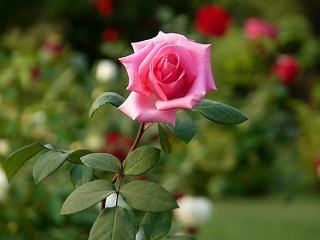

In [ ]:
PIL.Image.open(str(roses[1]))

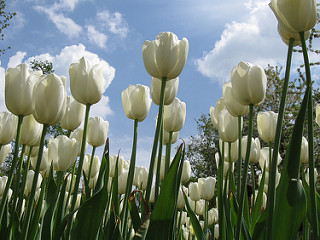

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

In [ ]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [ ]:
flowers_label_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['sunflowers'][0]))
img.shape

(281, 500, 3)

In [ ]:
cv2.resize(img,(100,100)).shape

(100, 100, 3)

In [ ]:
x , y = [] , []
for flower_name , images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(100,100))
    x.append(resized_img)
    y.append(flowers_label_dict[flower_name])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train , x_test = x_train/255.0 , x_test/255.0

In [ ]:
model = keras.Sequential([
                          keras.layers.Conv2D(16,(5,5),padding='same',activation='relu'),
                          keras.layers.MaxPool2D(),
                          keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
                          keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
                          keras.layers.MaxPool2D(),
                          keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
                          keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
                          keras.layers.MaxPool2D(),
                          keras.layers.Flatten(),
                          keras.layers.Dropout(0.4),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(5,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
92/92 [==============================] - 67s 708ms/step - loss: 1.3980 - accuracy: 0.3781 - val_loss: 1.2761 - val_accuracy: 0.4728
Epoch 2/30
92/92 [==============================] - 63s 683ms/step - loss: 1.1749 - accuracy: 0.5307 - val_loss: 1.0808 - val_accuracy: 0.5545
Epoch 3/30
92/92 [==============================] - 63s 688ms/step - loss: 0.9943 - accuracy: 0.6032 - val_loss: 0.9302 - val_accuracy: 0.6403
Epoch 4/30
92/92 [==============================] - 63s 684ms/step - loss: 0.9090 - accuracy: 0.6543 - val_loss: 0.9093 - val_accuracy: 0.6471
Epoch 5/30
92/92 [==============================] - 63s 689ms/step - loss: 0.8128 - accuracy: 0.6798 - val_loss: 0.8676 - val_accuracy: 0.6608
Epoch 6/30
92/92 [==============================] - 63s 690ms/step - loss: 0.7259 - accuracy: 0.7176 - val_loss: 0.8863 - val_accuracy: 0.6662
Epoch 7/30
92/92 [==============================] - 63s 690ms/step - loss: 0.6453 - accuracy: 0.7554 - val_loss: 0.8861 - val_accuracy: 0.6894

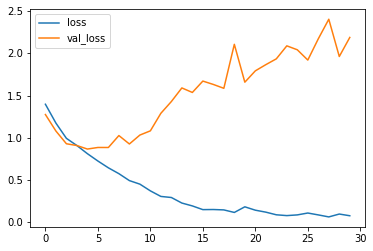

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

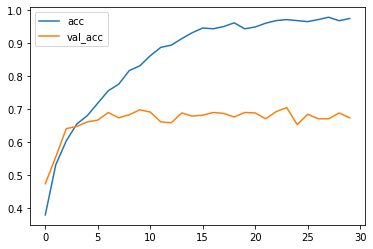

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
model.evaluate(x_test,y_test)

23/23 [==============================] - 4s 176ms/step - loss: 2.1888 - accuracy: 0.6730


[2.1887564659118652, 0.6730245351791382]

In [ ]:
prediction = model.predict(x_test)
prediction

array([[3.2671425e-01, 3.3813794e-03, 1.1814515e-05, 3.4759712e-05,
        6.6985774e-01],
       [1.2361240e-19, 1.0000000e+00, 5.3714460e-11, 1.6522718e-23,
        1.2792133e-17],
       [1.1772168e-08, 4.2308004e-11, 4.4393627e-07, 9.8119581e-01,
        1.8803697e-02],
       ...,
       [1.0137782e-14, 1.2558884e-10, 9.9639647e-06, 9.7559524e-01,
        2.4394790e-02],
       [3.1313133e-01, 4.9404187e-12, 7.9375663e-17, 7.9771738e-11,
        6.8686873e-01],
       [1.7995627e-03, 3.2896605e-10, 3.8218900e-08, 1.3343185e-08,
        9.9820042e-01]], dtype=float32)

In [ ]:
score = tf.nn.softmax(prediction)
score

<tf.Tensor: shape=(734, 5), dtype=float32, numpy=
array([[0.21854497, 0.15816818, 0.15763612, 0.15763974, 0.30801094],
       [0.1488476 , 0.4046097 , 0.1488476 , 0.1488476 , 0.1488476 ],
       [0.14955224, 0.14955224, 0.1495523 , 0.3989522 , 0.15239099],
       ...,
       [0.14975776, 0.14975776, 0.14975925, 0.39726925, 0.15345599],
       [0.21521033, 0.15735187, 0.15735187, 0.15735187, 0.31273407],
       [0.14918421, 0.14891599, 0.14891599, 0.14891599, 0.4040678 ]],
      dtype=float32)>

In [ ]:
np.argmax(score)

6

In [ ]:
y_test[0]

0

In [ ]:
data_augmentation = keras.Sequential([
                                      keras.layers.RandomZoom(0.1),
                                      keras.layers.RandomRotation(0.1),
                                      keras.layers.RandomFlip()

])

In [ ]:
model2 = keras.Sequential([
                          data_augmentation,
                          keras.layers.Conv2D(16,(5,5),padding='same',activation='relu'),
                          keras.layers.MaxPool2D(),
                          keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
                          keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
                          keras.layers.MaxPool2D(),
                          keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
                          keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
                          keras.layers.MaxPool2D(),
                          keras.layers.Flatten(),
                          keras.layers.Dropout(0.4),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(5,activation='softmax')
])
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2 = model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)


Epoch 1/30
92/92 [==============================] - 70s 742ms/step - loss: 1.4014 - accuracy: 0.3822 - val_loss: 1.2441 - val_accuracy: 0.4932
Epoch 2/30
92/92 [==============================] - 68s 739ms/step - loss: 1.2049 - accuracy: 0.4768 - val_loss: 1.2242 - val_accuracy: 0.4905
Epoch 3/30
92/92 [==============================] - 68s 737ms/step - loss: 1.0788 - accuracy: 0.5685 - val_loss: 1.0866 - val_accuracy: 0.5899
Epoch 4/30
92/92 [==============================] - 68s 736ms/step - loss: 1.0147 - accuracy: 0.5954 - val_loss: 1.0749 - val_accuracy: 0.6022
Epoch 5/30
92/92 [==============================] - 68s 739ms/step - loss: 0.9400 - accuracy: 0.6379 - val_loss: 1.0120 - val_accuracy: 0.6076
Epoch 6/30
92/92 [==============================] - 68s 740ms/step - loss: 0.9215 - accuracy: 0.6434 - val_loss: 0.9452 - val_accuracy: 0.6444
Epoch 7/30
92/92 [==============================] - 68s 740ms/step - loss: 0.8832 - accuracy: 0.6533 - val_loss: 1.0123 - val_accuracy: 0.6417

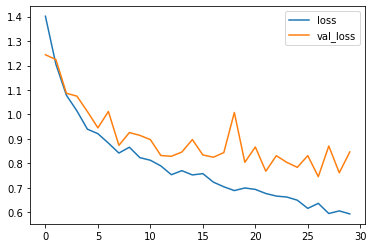

In [ ]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.legend()

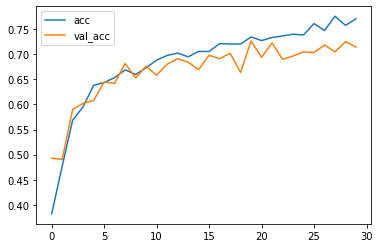

In [ ]:
plt.plot(history2.history['accuracy'], label='acc')
plt.plot(history2.history['val_accuracy'], label='val_acc')
plt.legend()